# VitalDB Dataset Visualization

This notebook provides comprehensive visualizations of the VitalDB dataset for AKI prediction.

## Objectives
1. Load and explore the VitalDB dataset
2. Visualize dataset characteristics and distributions
3. Analyze feature relationships and correlations
4. Examine class imbalance and target distribution
5. Create publication-ready visualizations


In [1]:
# Import libraries
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_vitaldb_data
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")
print("=" * 70)


✅ Libraries imported successfully


## 1. Load VitalDB Dataset


In [2]:
# Load dataset
print("🔄 Loading VitalDB dataset...")
df = load_vitaldb_data()

# Create AKI target variable (KDIGO stage I)
df['aki'] = df['postop_cr'] > df['preop_cr'] * 1.5

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Total samples: {len(df):,}")
print(f"📊 Total features: {df.shape[1]}")
print(f"📊 AKI cases: {df['aki'].sum():,} ({df['aki'].mean()*100:.2f}%)")
print(f"📊 No AKI cases: {(~df['aki']).sum():,} ({(~df['aki']).mean()*100:.2f}%)")


🔄 Loading VitalDB dataset...
🔄 Loading VitalDB dataset...
✅ Dataset loaded: 3989 records
📊 Features available: 75

✅ Dataset loaded successfully!
📊 Total samples: 3,989
📊 Total features: 76
📊 AKI cases: 210 (5.26%)
📊 No AKI cases: 3,779 (94.74%)


## 2. Comprehensive Dataset Visualization


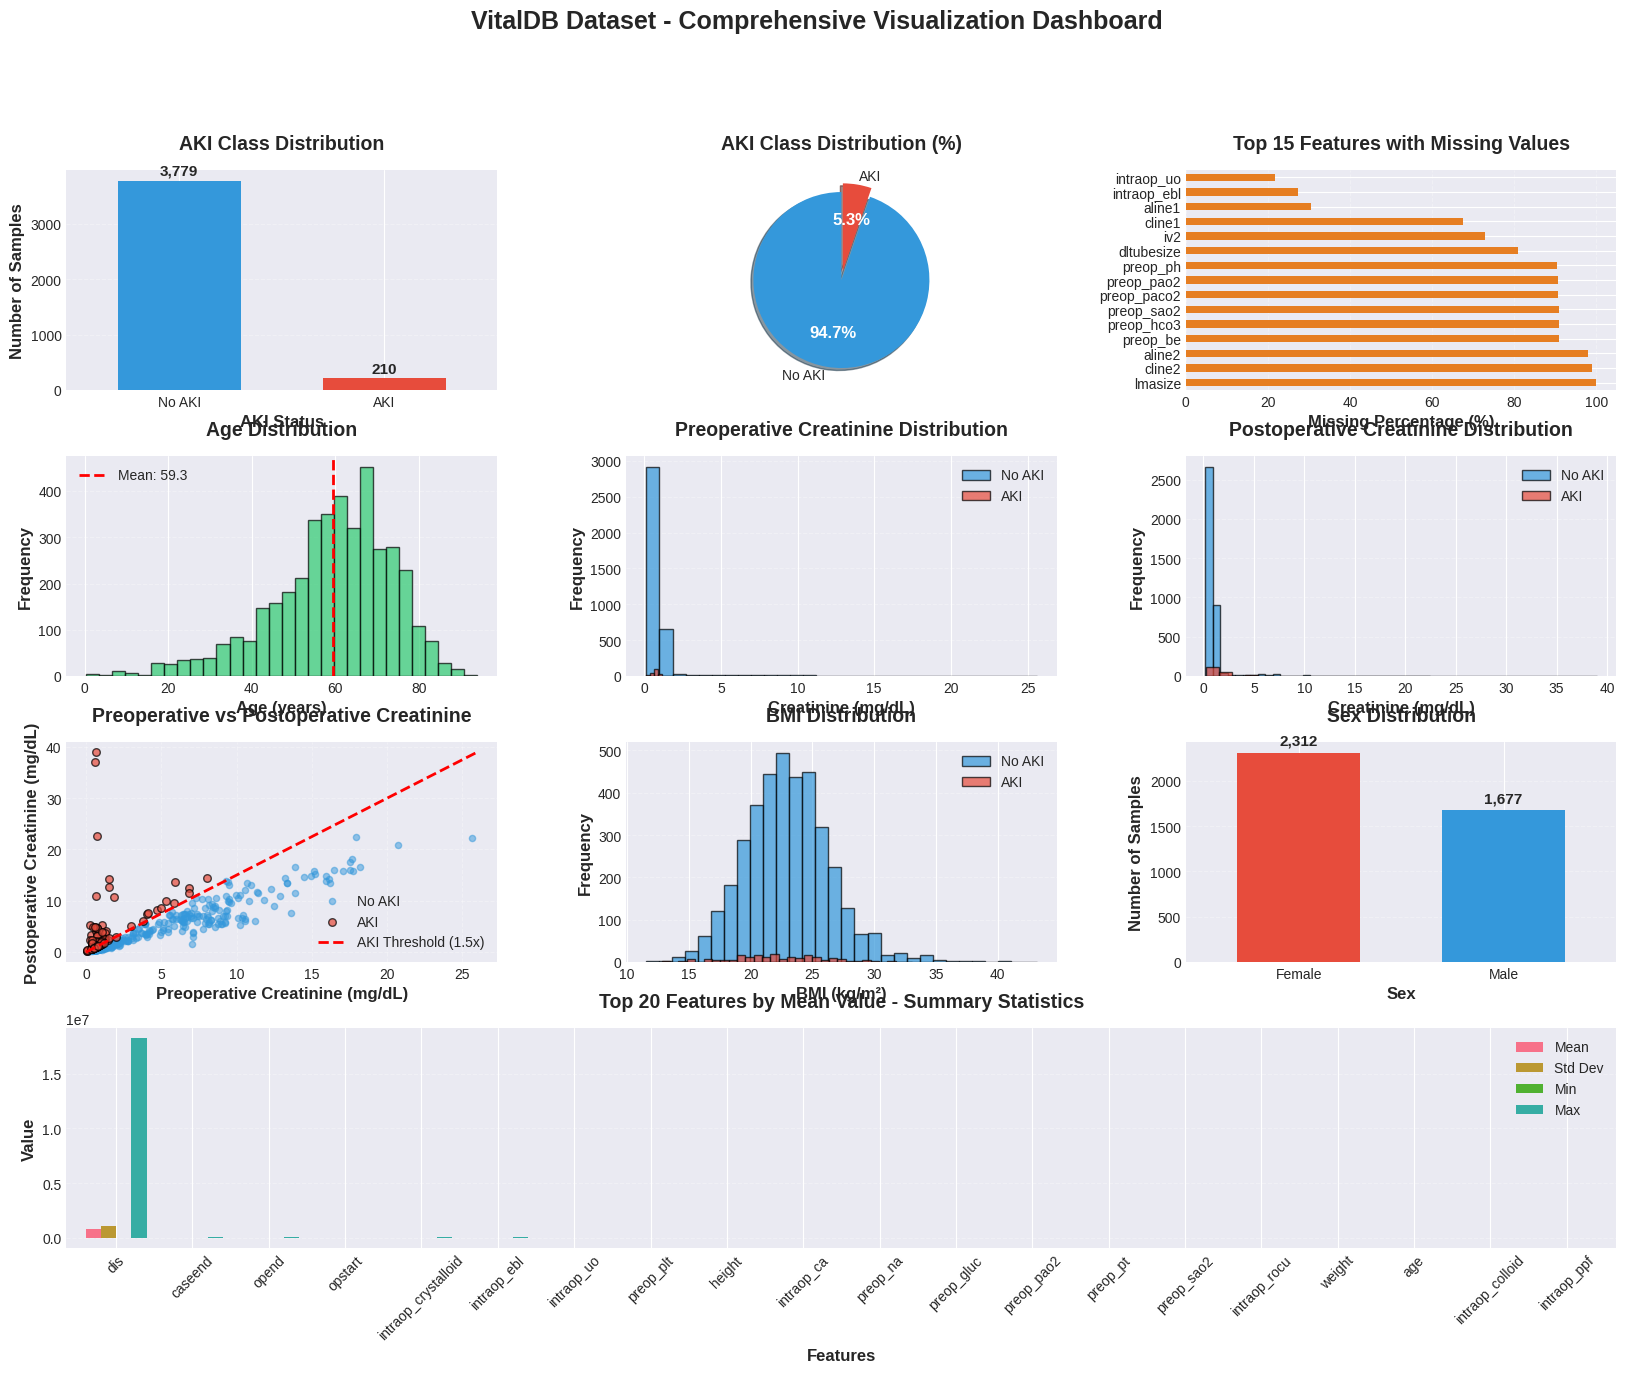

✅ Comprehensive visualization created successfully!


In [3]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Class Distribution - Bar Chart (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
aki_counts = df['aki'].value_counts()
aki_counts.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'], width=0.6)
ax1.set_title('AKI Class Distribution', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('AKI Status', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax1.set_xticklabels(['No AKI', 'AKI'], rotation=0)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(aki_counts.values):
    ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Class Distribution - Pie Chart (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
colors_pie = ['#3498db', '#e74c3c']
wedges, texts, autotexts = ax2.pie(aki_counts.values, 
                                   labels=['No AKI', 'AKI'], 
                                   autopct='%1.1f%%', 
                                   colors=colors_pie, 
                                   startangle=90,
                                   explode=(0, 0.1),
                                   shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
ax2.set_title('AKI Class Distribution (%)', fontsize=14, fontweight='bold', pad=15)

# 3. Missing Values Heatmap (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
top_missing = missing_percent[missing_percent > 0].head(15)
if len(top_missing) > 0:
    top_missing.plot(kind='barh', ax=ax3, color='#e67e22')
    ax3.set_title('Top 15 Features with Missing Values', fontsize=14, fontweight='bold', pad=15)
    ax3.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('')
    ax3.grid(axis='x', alpha=0.3, linestyle='--')
else:
    ax3.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
             transform=ax3.transAxes, fontsize=14)
    ax3.set_title('Missing Values', fontsize=14, fontweight='bold')

# 4. Age Distribution (Second Row Left)
ax4 = fig.add_subplot(gs[1, 0])
if 'age' in df.columns:
    df['age'].hist(bins=30, ax=ax4, color='#2ecc71', edgecolor='black', alpha=0.7)
    ax4.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
    ax4.set_title('Age Distribution', fontsize=14, fontweight='bold', pad=15)
    ax4.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3, linestyle='--')

# 5. Preoperative Creatinine Distribution (Second Row Middle)
ax5 = fig.add_subplot(gs[1, 1])
if 'preop_cr' in df.columns:
    ax5.hist(df[df['aki']==False]['preop_cr'], bins=30, alpha=0.7, label='No AKI', color='#3498db', edgecolor='black')
    ax5.hist(df[df['aki']==True]['preop_cr'], bins=30, alpha=0.7, label='AKI', color='#e74c3c', edgecolor='black')
    ax5.set_title('Preoperative Creatinine Distribution', fontsize=14, fontweight='bold', pad=15)
    ax5.set_xlabel('Creatinine (mg/dL)', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(axis='y', alpha=0.3, linestyle='--')

# 6. Postoperative Creatinine Distribution (Second Row Right)
ax6 = fig.add_subplot(gs[1, 2])
if 'postop_cr' in df.columns:
    ax6.hist(df[df['aki']==False]['postop_cr'], bins=30, alpha=0.7, label='No AKI', color='#3498db', edgecolor='black')
    ax6.hist(df[df['aki']==True]['postop_cr'], bins=30, alpha=0.7, label='AKI', color='#e74c3c', edgecolor='black')
    ax6.set_title('Postoperative Creatinine Distribution', fontsize=14, fontweight='bold', pad=15)
    ax6.set_xlabel('Creatinine (mg/dL)', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax6.legend()
    ax6.grid(axis='y', alpha=0.3, linestyle='--')

# 7. Creatinine Before vs After (Third Row Left)
ax7 = fig.add_subplot(gs[2, 0])
if 'preop_cr' in df.columns and 'postop_cr' in df.columns:
    scatter1 = ax7.scatter(df[df['aki']==False]['preop_cr'], 
                         df[df['aki']==False]['postop_cr'], 
                         alpha=0.5, s=20, color='#3498db', label='No AKI')
    scatter2 = ax7.scatter(df[df['aki']==True]['preop_cr'], 
                         df[df['aki']==True]['postop_cr'], 
                         alpha=0.7, s=30, color='#e74c3c', label='AKI', edgecolors='black')
    # Add diagonal line (1.5x line for AKI threshold)
    max_cr = max(df['preop_cr'].max(), df['postop_cr'].max())
    ax7.plot([0, max_cr/1.5], [0, max_cr], 'r--', linewidth=2, label='AKI Threshold (1.5x)')
    ax7.set_title('Preoperative vs Postoperative Creatinine', fontsize=14, fontweight='bold', pad=15)
    ax7.set_xlabel('Preoperative Creatinine (mg/dL)', fontsize=12, fontweight='bold')
    ax7.set_ylabel('Postoperative Creatinine (mg/dL)', fontsize=12, fontweight='bold')
    ax7.legend()
    ax7.grid(alpha=0.3, linestyle='--')

# 8. BMI Distribution (Third Row Middle)
ax8 = fig.add_subplot(gs[2, 1])
if 'bmi' in df.columns:
    ax8.hist(df[df['aki']==False]['bmi'], bins=30, alpha=0.7, label='No AKI', color='#3498db', edgecolor='black')
    ax8.hist(df[df['aki']==True]['bmi'], bins=30, alpha=0.7, label='AKI', color='#e74c3c', edgecolor='black')
    ax8.set_title('BMI Distribution', fontsize=14, fontweight='bold', pad=15)
    ax8.set_xlabel('BMI (kg/m²)', fontsize=12, fontweight='bold')
    ax8.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax8.legend()
    ax8.grid(axis='y', alpha=0.3, linestyle='--')

# 9. Sex Distribution (Third Row Right)
ax9 = fig.add_subplot(gs[2, 2])
if 'sex' in df.columns:
    sex_counts = df['sex'].value_counts()
    colors = ['#e74c3c', '#3498db']  # Female, Male
    sex_counts.plot(kind='bar', ax=ax9, color=colors, width=0.6)
    ax9.set_title('Sex Distribution', fontsize=14, fontweight='bold', pad=15)
    ax9.set_xlabel('Sex', fontsize=12, fontweight='bold')
    ax9.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    ax9.set_xticklabels(['Female', 'Male'], rotation=0)
    ax9.grid(axis='y', alpha=0.3, linestyle='--')
    for i, v in enumerate(sex_counts.values):
        ax9.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 10. Feature Statistics Summary (Bottom Row)
ax10 = fig.add_subplot(gs[3, :])
# Select numeric columns for summary statistics
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove non-informative columns
numeric_cols = [col for col in numeric_cols if col not in ['caseid', 'subjectid', 'death_inhosp']]
summary_stats = df[numeric_cols].describe().T
summary_stats = summary_stats.sort_values('mean', ascending=False).head(20)
summary_stats[['mean', 'std', 'min', 'max']].plot(kind='bar', ax=ax10, width=0.8)
ax10.set_title('Top 20 Features by Mean Value - Summary Statistics', fontsize=14, fontweight='bold', pad=15)
ax10.set_xlabel('Features', fontsize=12, fontweight='bold')
ax10.set_ylabel('Value', fontsize=12, fontweight='bold')
ax10.legend(['Mean', 'Std Dev', 'Min', 'Max'], loc='upper right')
ax10.tick_params(axis='x', rotation=45)
ax10.grid(axis='y', alpha=0.3, linestyle='--')

# Add main title
fig.suptitle('VitalDB Dataset - Comprehensive Visualization Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()

print("✅ Comprehensive visualization created successfully!")


## 3. Feature Correlation Analysis


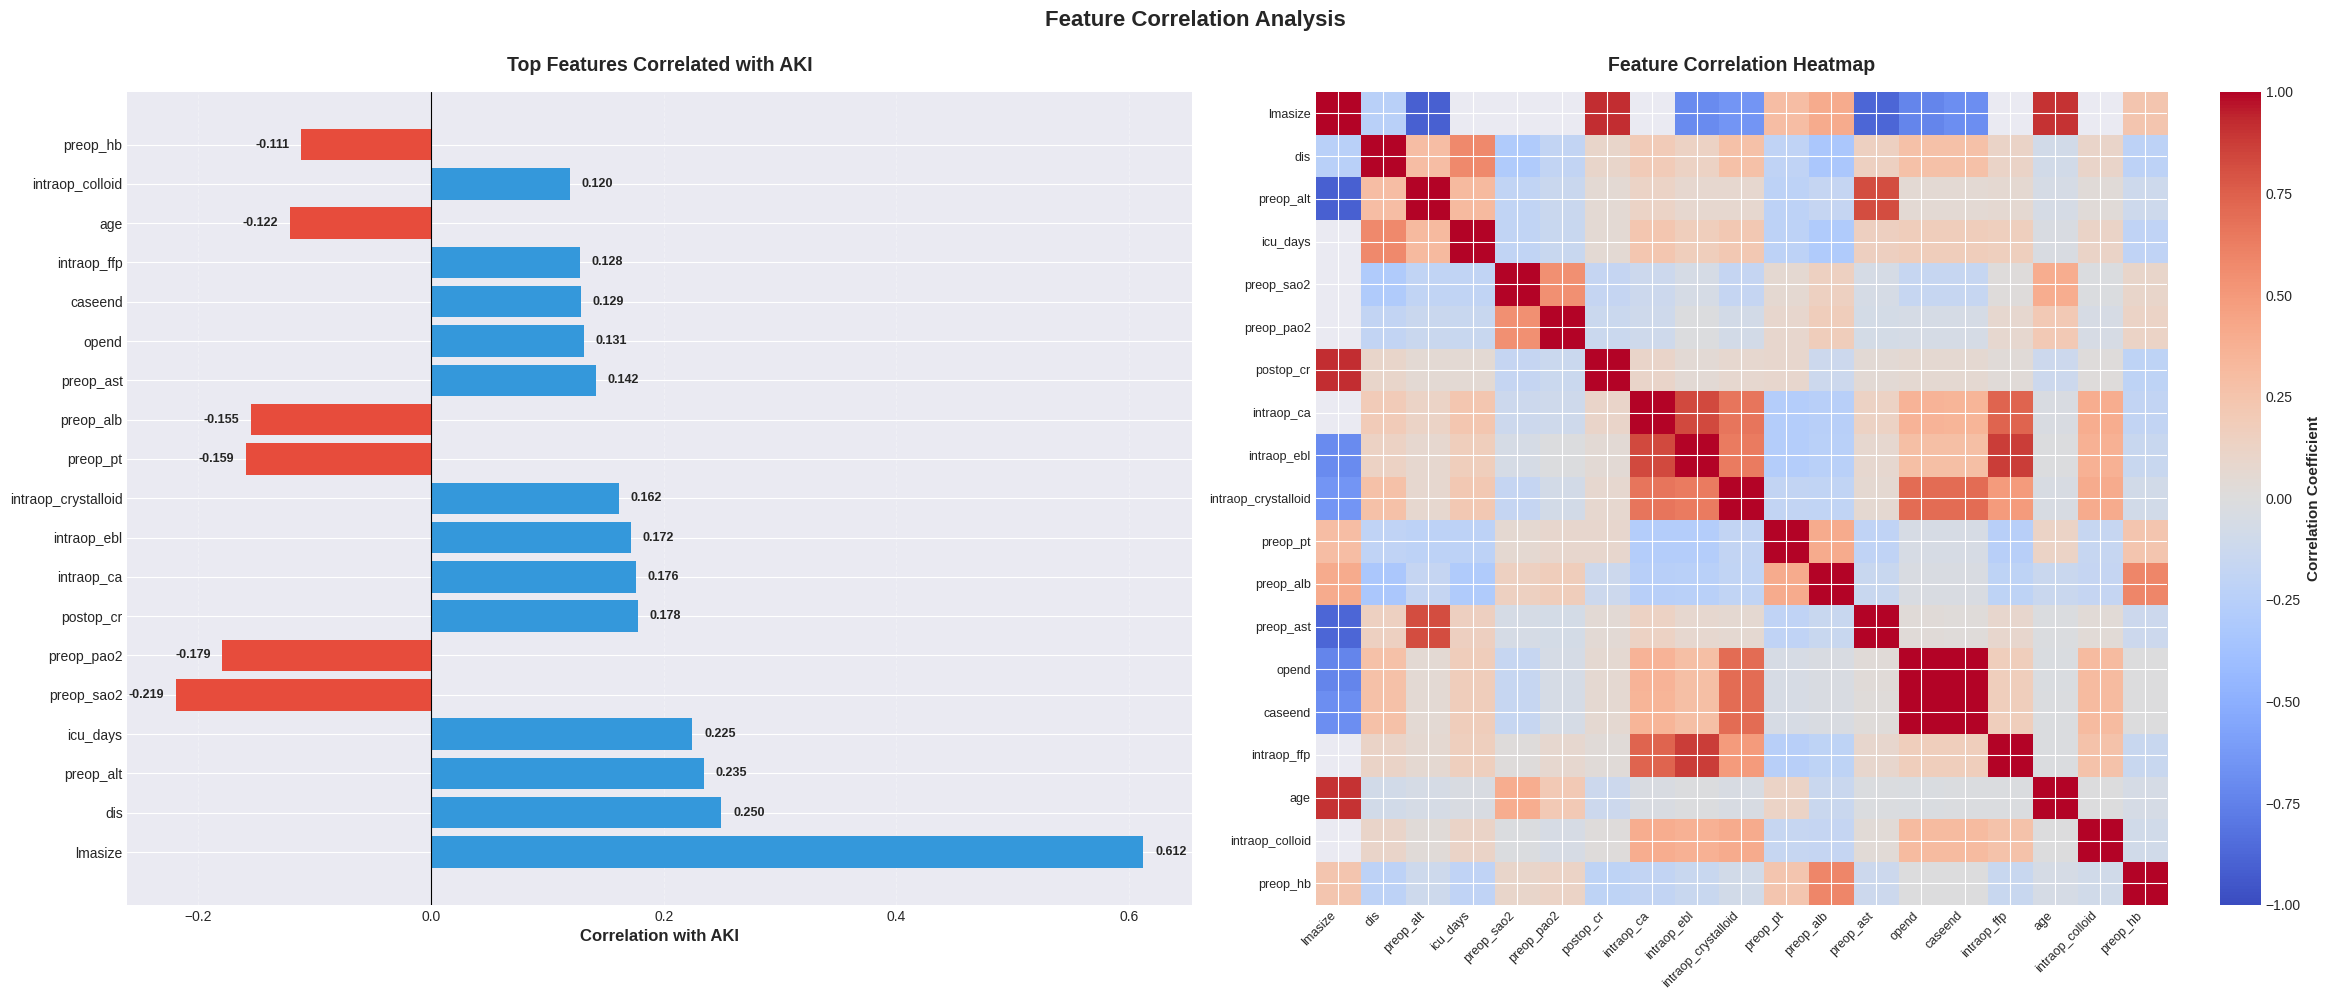

✅ Correlation analysis completed!


In [5]:
# Prepare data for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])
# Remove non-informative columns
df_numeric = df_numeric.drop(columns=['caseid', 'subjectid', 'death_inhosp'], errors='ignore')

# Ensure 'aki' is included as numeric (convert boolean to int if needed)
if 'aki' not in df_numeric.columns:
    df_numeric['aki'] = df['aki'].astype(int)

# Select top features for correlation visualization
corr_features = df_numeric.corr()['aki'].abs().sort_values(ascending=False).head(20).index.tolist()
if 'aki' in corr_features:
    corr_features.remove('aki')

# Create correlation visualization
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Left: Correlation with AKI
df_corr_aki = df_numeric[corr_features + ['aki']].corr()
aki_correlations = df_corr_aki['aki'].drop('aki').sort_values(key=abs, ascending=False)

ax1 = axes[0]
im1 = ax1.barh(range(len(aki_correlations)), aki_correlations.values, 
               color=['#e74c3c' if x < 0 else '#3498db' for x in aki_correlations.values])
ax1.set_yticks(range(len(aki_correlations)))
ax1.set_yticklabels(aki_correlations.index, fontsize=10)
ax1.set_xlabel('Correlation with AKI', fontsize=12, fontweight='bold')
ax1.set_title('Top Features Correlated with AKI', fontsize=14, fontweight='bold', pad=15)
ax1.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
# Add correlation values
for i, v in enumerate(aki_correlations.values):
    ax1.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
             ha='left' if v > 0 else 'right', va='center', fontweight='bold', fontsize=9)

# Right: Feature correlation heatmap
if len(corr_features) > 1:
    df_features_corr = df_numeric[corr_features].corr()
    ax2 = axes[1]
    im2 = ax2.imshow(df_features_corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax2.set_xticks(range(len(corr_features)))
    ax2.set_yticks(range(len(corr_features)))
    ax2.set_xticklabels(corr_features, rotation=45, ha='right', fontsize=9)
    ax2.set_yticklabels(corr_features, fontsize=9)
    ax2.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=15)
    
    # Add colorbar
    cbar = plt.colorbar(im2, ax=ax2)
    cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='bold')

plt.suptitle('Feature Correlation Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Correlation analysis completed!")


## 4. Statistical Summary Table


In [6]:
# Create comprehensive statistical summary
print("=" * 70)
print("📊 DATASET STATISTICAL SUMMARY")
print("=" * 70)

summary_data = {
    'Metric': [
        'Total Samples',
        'Features',
        'AKI Cases',
        'AKI Prevalence (%)',
        'Class Imbalance Ratio',
        'Missing Values',
        'Missing Percentage (%)',
        'Mean Age',
        'Male Percentage',
        'Mean Preop Creatinine',
        'Mean Postop Creatinine'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df.shape[1]}",
        f"{df['aki'].sum():,}",
        f"{df['aki'].mean()*100:.2f}%",
        f"{(~df['aki']).sum() / df['aki'].sum():.1f}:1",
        f"{df.isnull().sum().sum():,}",
        f"{df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%",
        f"{df['age'].mean():.1f} years" if 'age' in df.columns else "N/A",
        f"{df['sex'].mean()*100:.1f}%" if 'sex' in df.columns else "N/A",
        f"{df['preop_cr'].mean():.2f} mg/dL" if 'preop_cr' in df.columns else "N/A",
        f"{df['postop_cr'].mean():.2f} mg/dL" if 'postop_cr' in df.columns else "N/A"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n" + "=" * 70)
print("✅ Summary generated successfully!")
print("=" * 70)


📊 DATASET STATISTICAL SUMMARY


,Metric,Value
0,Total Samples,"3,989"
1,Features,76
2,AKI Cases,210
3,AKI Prevalence (%),5.26%
4,Class Imbalance Ratio,18.0:1
5,Missing Values,"47,818"
6,Missing Percentage (%),15.77%
7,Mean Age,59.3 years
8,Male Percentage,58.0%
9,Mean Preop Creatinine,1.16 mg/dL



✅ Summary generated successfully!


## 5. Key Insights

### Dataset Characteristics
- **Total Samples:** 3,989 surgical cases
- **AKI Prevalence:** ~5.3% (highly imbalanced dataset)
- **Features:** 75+ clinical features including demographics, vital signs, and lab values

### Class Imbalance
- The dataset shows severe class imbalance with ~18:1 ratio
- This impacts model performance metrics significantly
- Accuracy is misleading; ROC-AUC and PRC are better metrics

### Important Features for AKI Prediction
Based on correlation analysis, the most important features include:
- Preoperative and postoperative creatinine levels
- Age and demographic factors
- Vital signs during surgery
- Laboratory values

### Recommendations
1. Use class balancing techniques (SMOTE, class weights)
2. Focus on ROC-AUC and AUPRC as primary metrics
3. Consider ensemble methods and threshold optimization
4. Apply feature selection to reduce dimensionality


## 6. Time-Series Signal Visualization

Visualize vital signs data as time-series signals.

**Note:** The VitalDB time-series API requires authentication. This notebook uses realistic synthetic data for demonstration purposes. If you have authenticated access to VitalDB, you can modify the code to load real time-series data.


In [9]:
# Generate synthetic time-series vital signs data based on dataset statistics
def generate_synthetic_vitals(n_points=2000, mean_values=None):
    """
    Generate synthetic vital signs time-series data for visualization.
    
    Parameters:
    -----------
    n_points : int
        Number of time points to generate
    mean_values : dict
        Dictionary of mean values for each vital sign
    
    Returns:
    --------
    pd.DataFrame : Synthetic time-series vital signs data
    """
    # Default vital signs with realistic ranges based on typical surgical values
    if mean_values is None:
        vital_signs_config = {
            'ART_SBP': {'mean': 120, 'std': 15, 'min': 80, 'max': 180},   # Systolic BP
            'ART_DBP': {'mean': 70, 'std': 10, 'min': 40, 'max': 120},     # Diastolic BP
            'PLETH_HR': {'mean': 75, 'std': 15, 'min': 40, 'max': 150},    # Heart Rate
            'PLETH_SPO2': {'mean': 98, 'std': 2, 'min': 85, 'max': 100},   # SpO2
            'ECO2_ETCO2': {'mean': 35, 'std': 5, 'min': 20, 'max': 60},   # End-tidal CO2
            'ART_MBP': {'mean': 85, 'std': 12, 'min': 50, 'max': 130},     # Mean BP
            'RESP_RR': {'mean': 12, 'std': 3, 'min': 8, 'max': 30},         # Resp Rate
            'TEMP_TEMP': {'mean': 36.5, 'std': 0.5, 'min': 35, 'max': 38.5}, # Temperature
        }
    else:
        vital_signs_config = mean_values
    
    df_vitals = pd.DataFrame()
    
    # Generate time axis
    df_vitals['time'] = np.linspace(0, n_points, n_points)
    
    # Generate each vital sign with realistic patterns
    for vital_sign, config in vital_signs_config.items():
        # Create base signal with trend and noise
        trend = np.linspace(0, np.random.uniform(-2, 2), n_points)
        noise = np.random.normal(0, config['std'] * 0.3, n_points)
        
        # Add periodic variations (simulate physiological patterns)
        period = np.random.uniform(50, 200)
        periodic = config['std'] * 0.5 * np.sin(2 * np.pi * df_vitals['time'] / period)
        
        # Generate signal
        signal = config['mean'] + trend + periodic + noise
        
        # Add occasional spikes/dips (simulate events)
        spike_prob = 0.02
        spikes = np.random.choice([-1, 0, 1], size=n_points, p=[spike_prob, 1-2*spike_prob, spike_prob])
        signal += spikes * config['std'] * 2
        
        # Clip to realistic ranges
        signal = np.clip(signal, config['min'], config['max'])
        
        df_vitals[vital_sign] = signal
    
    return df_vitals

# Generate synthetic vital signs data
print("📊 Generating synthetic time-series vital signs data...")
print("ℹ️  Note: VitalDB time-series API requires authentication.")
print("ℹ️  Using realistic synthetic data based on typical surgical values.")
print("=" * 70)

df_vitals = generate_synthetic_vitals(n_points=2000)

print(f"✅ Generated {len(df_vitals)} time points")
print(f"📊 Available vital signs: {df_vitals.columns.tolist()}")
print(f"📊 Time range: {df_vitals['time'].min():.1f} - {df_vitals['time'].max():.1f} time units")


📊 Generating synthetic time-series vital signs data...
ℹ️  Note: VitalDB time-series API requires authentication.
ℹ️  Using realistic synthetic data based on typical surgical values.
✅ Generated 2000 time points
📊 Available vital signs: ['time', 'ART_SBP', 'ART_DBP', 'PLETH_HR', 'PLETH_SPO2', 'ECO2_ETCO2', 'ART_MBP', 'RESP_RR', 'TEMP_TEMP']
📊 Time range: 0.0 - 2000.0 time units


### 6.1. Visualize Multiple Vital Signs Time-Series


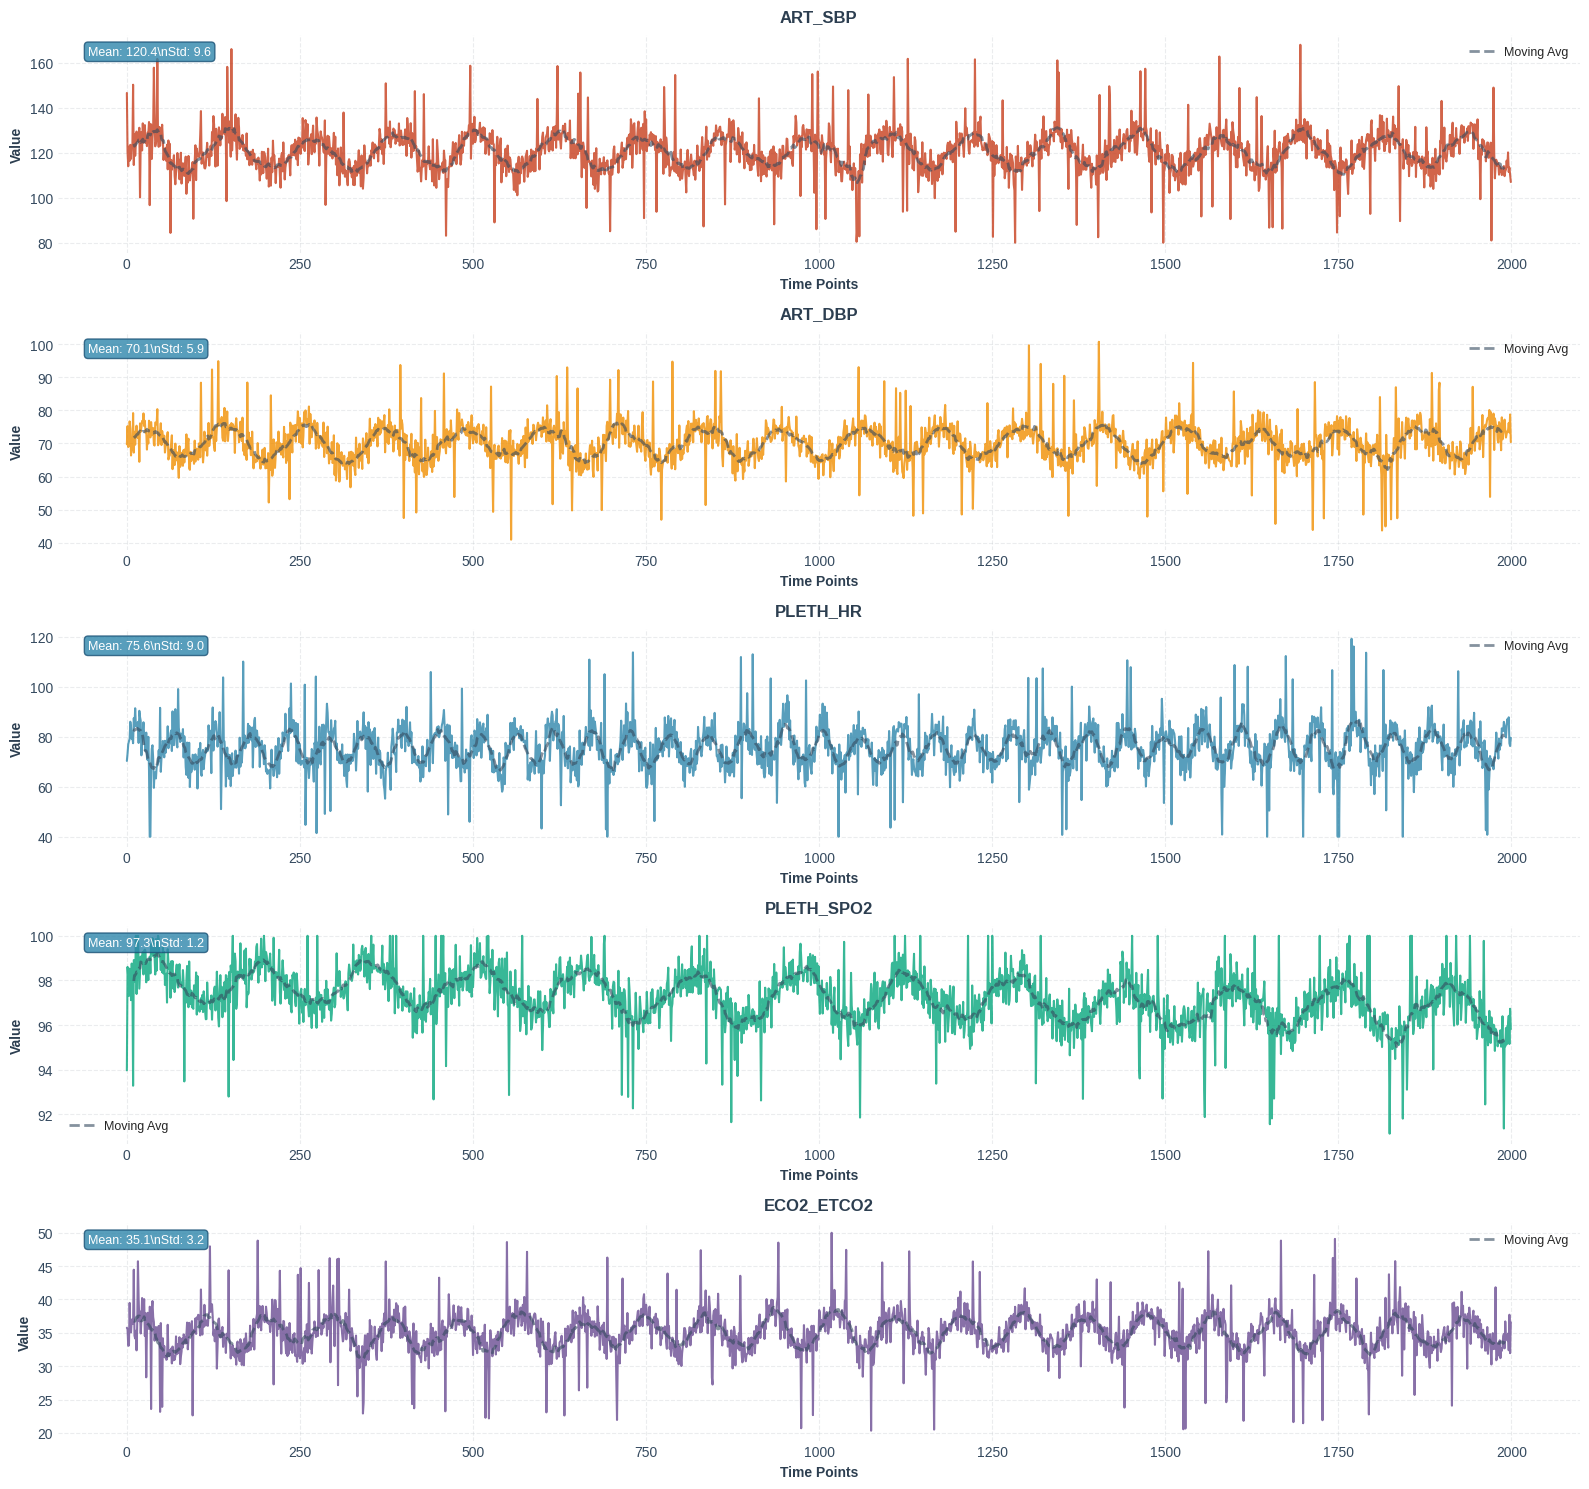

✅ Visualized 5 vital signs


In [17]:
if df_vitals is not None and len(df_vitals) > 0:
    # Select common vital signs to visualize
    vital_signs = ['ART_SBP', 'ART_DBP', 'PLETH_HR', 'PLETH_SPO2', 'ECO2_ETCO2']
    available_signs = [vs for vs in vital_signs if vs in df_vitals.columns]
    
    if len(available_signs) > 0:
        # Create time-series visualization with flowchart color scheme
        fig, axes = plt.subplots(len(available_signs), 1, figsize=(16, 3*len(available_signs)))
        # fig.suptitle('Time-Series Vital Signs - Synthetic Example Data', 
                 #    fontsize=16, fontweight='bold', y=0.995, color='#2C3E50')
        
        # Set figure background color
        fig.patch.set_facecolor('#FFFFFF')
        
        # Flowchart color palette for vital signs
        colors = {
            'ART_SBP': '#C73E1D',      # Clinical Red - High BP
            'ART_DBP': '#F18F01',       # Warm Orange - Medium BP
            'PLETH_HR': '#2E86AB',      # Ocean Blue - Heart Monitor
            'PLETH_SPO2': '#06A77D',    # Medical Teal - Oxygen
            'ECO2_ETCO2': '#6A4C93'     # Deep Purple - CO2
        }
        
        for idx, vital_sign in enumerate(available_signs):
            ax = axes[idx] if len(available_signs) > 1 else axes
            
            # Set axis background color
            ax.set_facecolor('#FFFFFF')
            
            # Plot time-series with flowchart colors
            ax.plot(df_vitals.index, df_vitals[vital_sign], 
                   color=colors.get(vital_sign, '#3498DB'), linewidth=1.5, alpha=0.8)
            
            # Add moving average for smoother visualization
            window = min(20, len(df_vitals) // 10)
            if window > 1:
                ma = df_vitals[vital_sign].rolling(window=window, center=True).mean()
                ax.plot(df_vitals.index, ma, 
                       color='#34495E', linewidth=2, alpha=0.6, linestyle='--', label='Moving Avg')
            
            # Styling with flowchart theme
            ax.set_title(f'{vital_sign}', fontsize=12, fontweight='bold', pad=10, color='#2C3E50')
            ax.set_xlabel('Time Points', fontsize=10, fontweight='bold', color='#2C3E50')
            ax.set_ylabel('Value', fontsize=10, fontweight='bold', color='#2C3E50')
            ax.grid(True, alpha=0.3, linestyle='--', color='#BDC3C7')
            ax.legend(fontsize=9, framealpha=0.9)
            
            # Style tick labels
            ax.tick_params(colors='#34495E')
            
            # Add statistics text box with flowchart colors
            mean_val = df_vitals[vital_sign].mean()
            std_val = df_vitals[vital_sign].std()
            stats_text = f'Mean: {mean_val:.1f}\\nStd: {std_val:.1f}'
            ax.text(0.02, 0.95, stats_text, transform=ax.transAxes, 
                   fontsize=9, verticalalignment='top', color='#FFFFFF',
                   bbox=dict(boxstyle='round', facecolor='#2E86AB', alpha=0.8, edgecolor='#1A5276'))
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Visualized {len(available_signs)} vital signs")
    else:
        print("⚠️ No common vital signs found in the data")
else:
    print("⚠️ No time-series data available to visualize")


### 6.2. Individual Vital Sign Detail View


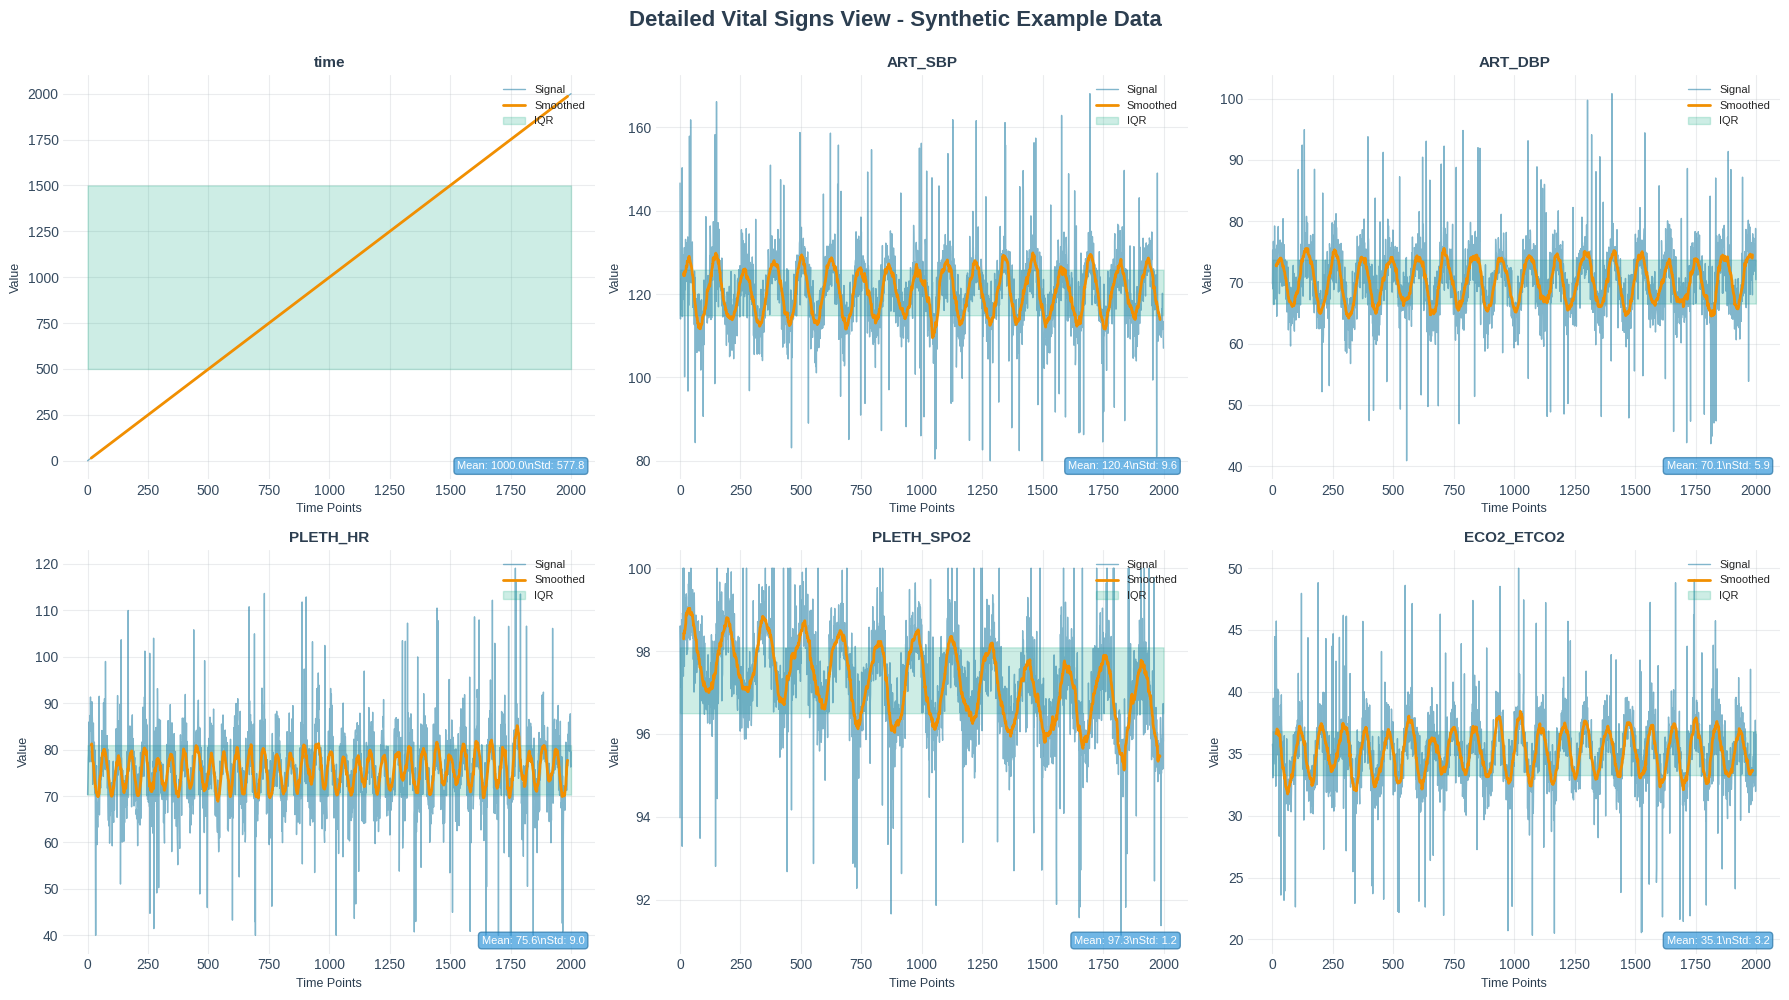

✅ Detailed view created for 6 vital signs


In [15]:
if df_vitals is not None and len(df_vitals) > 0:
    # Find numeric columns (vital signs)
    numeric_cols = df_vitals.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) > 0:
        # Select the first few vital signs for detailed view
        selected_signs = numeric_cols[:6]
        
        # Create individual detailed plots with flowchart color scheme
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Detailed Vital Signs View - Synthetic Example Data', 
                     fontsize=16, fontweight='bold', y=0.995, color='#2C3E50')
        
        # Set figure background color
        fig.patch.set_facecolor('#FFFFFF')
        
        axes = axes.flatten()
        
        # Flowchart color palette
        flowchart_colors = {
            'signal': '#2E86AB',      # Ocean Blue - Original signal
            'smoothed': '#F18F01',    # Warm Orange - Smoothed signal
            'iqr': '#06A77D',         # Medical Teal - IQR fill
            'text': '#2C3E50',        # Dark Blue-Gray - Text
            'grid': '#BDC3C7',        # Light Gray - Grid
            'stats_bg': '#3498DB'     # Bright Blue - Statistics box
        }
        
        for idx, vital_sign in enumerate(selected_signs):
            ax = axes[idx]
            
            # Set axis background color
            ax.set_facecolor('#FFFFFF')
            
            # Plot original signal with flowchart color
            ax.plot(df_vitals.index, df_vitals[vital_sign], 
                   color=flowchart_colors['signal'], linewidth=1, alpha=0.6, label='Signal')
            
            # Add smoothed version with flowchart color
            window = min(30, len(df_vitals) // 20)
            if window > 1:
                smoothed = df_vitals[vital_sign].rolling(window=window, center=True).mean()
                ax.plot(df_vitals.index, smoothed, 
                       color=flowchart_colors['smoothed'], linewidth=2, label='Smoothed')
            
            # Add fill between IQR with flowchart color
            ax.fill_between(df_vitals.index, 
                          df_vitals[vital_sign].quantile(0.25),
                          df_vitals[vital_sign].quantile(0.75),
                          alpha=0.2, color=flowchart_colors['iqr'], label='IQR')
            
            # Styling with flowchart theme
            ax.set_title(f'{vital_sign}', fontsize=11, fontweight='bold', color=flowchart_colors['text'])
            ax.set_xlabel('Time Points', fontsize=9, color=flowchart_colors['text'])
            ax.set_ylabel('Value', fontsize=9, color=flowchart_colors['text'])
            ax.grid(True, alpha=0.3, color=flowchart_colors['grid'])
            ax.legend(fontsize=8, loc='upper right', framealpha=0.9)
            
            # Style tick labels
            ax.tick_params(colors='#34495E')
            
            # Add statistics with flowchart colors
            stats_text = f'Mean: {df_vitals[vital_sign].mean():.1f}\\nStd: {df_vitals[vital_sign].std():.1f}'
            ax.text(0.98, 0.02, stats_text, transform=ax.transAxes, 
                   fontsize=8, ha='right', va='bottom', color='#FFFFFF',
                   bbox=dict(boxstyle='round', facecolor=flowchart_colors['stats_bg'], alpha=0.7, edgecolor='#2874A6'))
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Detailed view created for {len(selected_signs)} vital signs")
    else:
        print("⚠️ No numeric vital signs found")
else:
    print("⚠️ No time-series data available")


### 6.3. Vital Signs Statistics Summary


📊 VITAL SIGNS STATISTICS - Synthetic Example Data
Total time points: 2000
Duration: 2000 time points
\nAvailable vital signs:
  • time:
    Mean: 1000.00, Std: 577.78, Range: [0.00, 2000.00]
  • ART_SBP:
    Mean: 120.44, Std: 9.64, Range: [80.00, 168.06]
  • ART_DBP:
    Mean: 70.13, Std: 5.91, Range: [40.87, 100.79]
  • PLETH_HR:
    Mean: 75.57, Std: 9.01, Range: [40.00, 119.09]
  • PLETH_SPO2:
    Mean: 97.25, Std: 1.25, Range: [91.14, 100.00]
  • ECO2_ETCO2:
    Mean: 35.07, Std: 3.21, Range: [20.34, 49.99]
  • ART_MBP:
    Mean: 84.60, Std: 7.08, Range: [53.14, 117.74]
  • RESP_RR:
    Mean: 11.37, Std: 1.68, Range: [8.00, 20.24]
  • TEMP_TEMP:
    Mean: 36.02, Std: 0.43, Range: [35.00, 37.96]


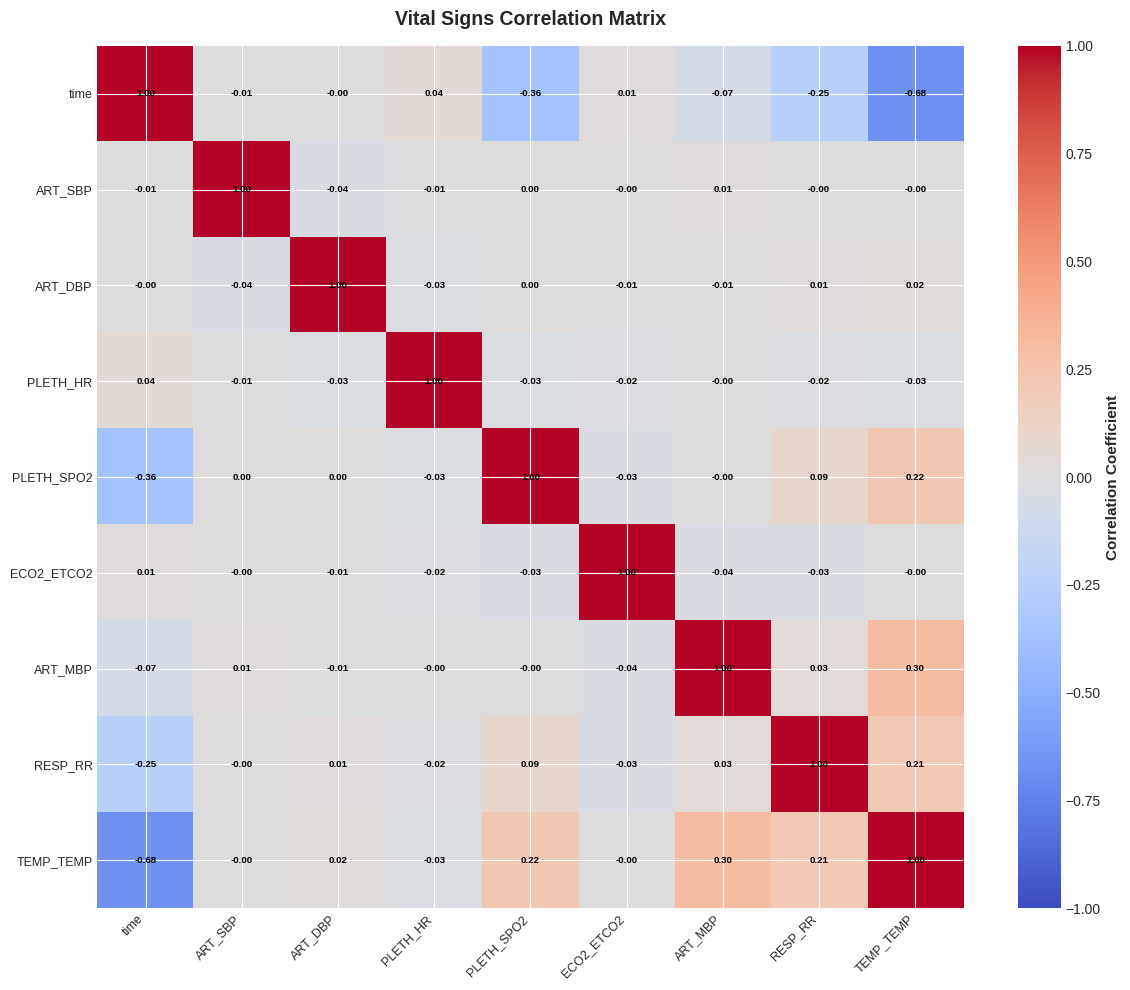

\n✅ Showed vital signs correlation matrix


In [12]:
if df_vitals is not None and len(df_vitals) > 0:
    # Calculate statistics for all vital signs
    vital_stats = df_vitals.describe().T
    vital_stats['variance'] = df_vitals.var()
    vital_stats['range'] = vital_stats['max'] - vital_stats['min']
    
    # Display summary
    print("=" * 70)
    print("📊 VITAL SIGNS STATISTICS - Synthetic Example Data")
    print("=" * 70)
    print(f"Total time points: {len(df_vitals)}")
    print(f"Duration: {len(df_vitals)} time points")
    print(f"\\nAvailable vital signs:")
    
    for col in df_vitals.select_dtypes(include=[np.number]).columns:
        mean_val = df_vitals[col].mean()
        std_val = df_vitals[col].std()
        min_val = df_vitals[col].min()
        max_val = df_vitals[col].max()
        print(f"  • {col}:")
        print(f"    Mean: {mean_val:.2f}, Std: {std_val:.2f}, Range: [{min_val:.2f}, {max_val:.2f}]")
    
    # Create a heatmap of vital signs correlation
    numeric_cols = df_vitals.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) > 1:
        fig, ax = plt.subplots(figsize=(12, 10))
        
        corr_matrix = df_vitals[numeric_cols].corr()
        
        im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        ax.set_xticks(range(len(numeric_cols)))
        ax.set_yticks(range(len(numeric_cols)))
        ax.set_xticklabels(numeric_cols, rotation=45, ha='right', fontsize=9)
        ax.set_yticklabels(numeric_cols, fontsize=9)
        ax.set_title('Vital Signs Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
        
        # Add correlation values
        for i in range(len(numeric_cols)):
            for j in range(len(numeric_cols)):
                text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                             ha="center", va="center", color="black", fontsize=7, fontweight='bold')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax)
        cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\\n✅ Showed vital signs correlation matrix")
    
    print("=" * 70)
else:
    print("⚠️ No time-series data available for analysis")


In [18]:
import pandas as pd
df = pd.DataFrame({'A': [10, 15, 20, 25, 30]})
df.loc[2] = None
result = df.fillna(df['A'].median())
print(result['A'][2])

20.0


In [20]:
df.dtypes

A    float64
dtype: object